In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc
import gradio as gr
np.random.seed(123)

In [2]:
df = pd.read_excel('../event_class.xlsx', sheet_name=0, header=0)
df.head()

,Sex,Age,FC,PRint,QRSaxis,QRSwidDII,QRSwidV1,QRSwidV2,QRSwidV6,QTintV5,...,JelevV2,SwidDI,SlenDI,RwidaVR,RlenaVR,Type1aVR,Type1naVRlimb,fQRS,ECG utilizzato,classifier
0,M,47.0,66,140.0,30.0,80.0,90,120,90.0,400.0,...,0.10,0.00,0.0,0.0,0.0,0.0,0.0,0.0,acgi60 basale,0
1,M,47.0,67,160.0,30.0,80.0,90,90,80.0,400.0,...,0.10,0.00,0.0,0.0,0.0,0.0,0.0,0.0,acgi60 basale II,0
2,F,41.0,75,170.0,60.0,80.0,80,90,80.0,400.0,...,0.00,0.20,40.0,0.2,40.0,0.0,0.0,0.0,acgi65 basale (V1.V2),0
3,M,28.0,115,160.0,90.0,100.0,100,100,100.0,340.0,...,0.10,0.20,30.0,0.2,30.0,0.0,0.0,0.0,acro85 basale (V1.V2),0
4,M,54.0,83,140.0,-30.0,90.0,80,80,90.0,360.0,...,0.15,0.05,20.0,0.3,30.0,0.0,0.0,1.0,aimo64 basale (V1.V2),0


In [3]:
df.shape

(207, 26)

In [4]:
print('"event" class has a total of {} rows'.format(df.query('classifier == 1').shape[0]))
print('"non-event" class has a total of {} rows'.format(df.query('classifier == 0').shape[0]))

"event" class has a total of 38 rows
"non-event" class has a total of 169 rows


In [5]:
df = df.drop(labels='ECG utilizzato', axis=1)

In [6]:
sex_le = LabelEncoder()
sex_label = sex_le.fit_transform(df['Sex'])
df['Sex'] = sex_label
df.head()

,Sex,Age,FC,PRint,QRSaxis,QRSwidDII,QRSwidV1,QRSwidV2,QRSwidV6,QTintV5,...,JelevV1,JelevV2,SwidDI,SlenDI,RwidaVR,RlenaVR,Type1aVR,Type1naVRlimb,fQRS,classifier
0,1,47.0,66,140.0,30.0,80.0,90,120,90.0,400.0,...,0.0,0.10,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,47.0,67,160.0,30.0,80.0,90,90,80.0,400.0,...,0.1,0.10,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,41.0,75,170.0,60.0,80.0,80,90,80.0,400.0,...,0.0,0.00,0.20,40.0,0.2,40.0,0.0,0.0,0.0,0
3,1,28.0,115,160.0,90.0,100.0,100,100,100.0,340.0,...,0.0,0.10,0.20,30.0,0.2,30.0,0.0,0.0,0.0,0
4,1,54.0,83,140.0,-30.0,90.0,80,80,90.0,360.0,...,0.1,0.15,0.05,20.0,0.3,30.0,0.0,0.0,1.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            207 non-null    int64  
 1   Age            195 non-null    float64
 2   FC             207 non-null    int64  
 3   PRint          206 non-null    float64
 4   QRSaxis        171 non-null    float64
 5   QRSwidDII      206 non-null    float64
 6   QRSwidV1       207 non-null    int64  
 7   QRSwidV2       207 non-null    int64  
 8   QRSwidV6       206 non-null    float64
 9   QTintV5        206 non-null    float64
 10  QTintV2        207 non-null    int64  
 11  cQTintV5       206 non-null    float64
 12  cQTintV2       207 non-null    int64  
 13  TpeakTendV2    169 non-null    float64
 14  JTendV2        207 non-null    int64  
 15  JelevV1        205 non-null    float64
 16  JelevV2        206 non-null    float64
 17  SwidDI         204 non-null    float64
 18  SlenDI    

In [8]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['PRint'].fillna((df['PRint'].mode()[0]), inplace=True)
df['QRSaxis'].fillna((df['QRSaxis'].mode()[0]), inplace=True)
df['QRSwidDII'].fillna((df['QRSwidDII'].median()), inplace=True)
df['QRSwidV6'].fillna((df['QRSwidV6'].median()), inplace=True)
df['QTintV5'].fillna((df['QTintV5'].median()), inplace=True)
df['cQTintV5'].fillna((df['cQTintV5'].median()), inplace=True)
df['TpeakTendV2'].fillna((df['TpeakTendV2'].mode()[0]), inplace=True)
df['JelevV1'].fillna((df['JelevV1'].mode()[0]), inplace=True)
df['JelevV2'].fillna((df['JelevV2'].mode()[0]), inplace=True)
df['SwidDI'].fillna((df['SwidDI'].median()), inplace=True)
df['SlenDI'].fillna((df['SlenDI'].median()), inplace=True)
df['RwidaVR'].fillna((df['RwidaVR'].median()), inplace=True)
df['Type1aVR'] = df['Type1aVR'].fillna(0.5)
df['Type1naVRlimb'] = df['Type1naVRlimb'].fillna(0.5)
df['fQRS'] = df['fQRS'].fillna(0.5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            207 non-null    int64  
 1   Age            207 non-null    float64
 2   FC             207 non-null    int64  
 3   PRint          207 non-null    float64
 4   QRSaxis        207 non-null    float64
 5   QRSwidDII      207 non-null    float64
 6   QRSwidV1       207 non-null    int64  
 7   QRSwidV2       207 non-null    int64  
 8   QRSwidV6       207 non-null    float64
 9   QTintV5        207 non-null    float64
 10  QTintV2        207 non-null    int64  
 11  cQTintV5       207 non-null    float64
 12  cQTintV2       207 non-null    int64  
 13  TpeakTendV2    207 non-null    float64
 14  JTendV2        207 non-null    int64  
 15  JelevV1        207 non-null    float64
 16  JelevV2        207 non-null    float64
 17  SwidDI         207 non-null    float64
 18  SlenDI    

In [9]:
event_df = df.query('classifier == 1')
nonevent_df = df.query('classifier == 0')

In [10]:
corr = df.corr()
corr_ev = event_df.corr()
corr_nonev = nonevent_df.corr()

<AxesSubplot:>

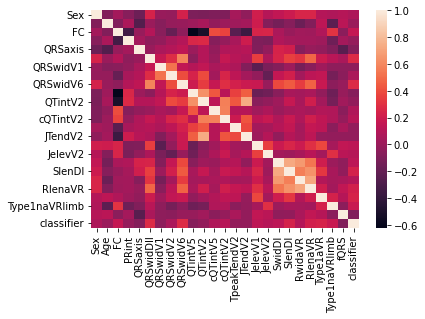

In [11]:
sns.heatmap(corr)

<AxesSubplot:>

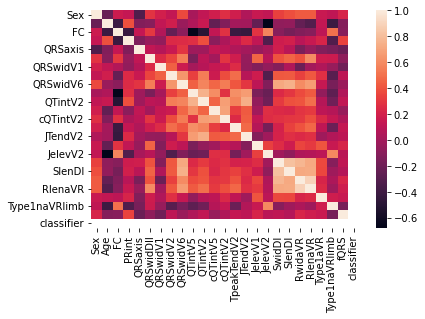

In [12]:
sns.heatmap(corr_ev)

<AxesSubplot:>

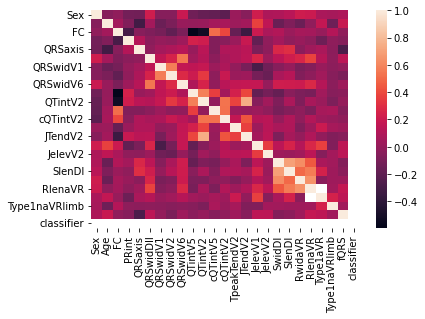

In [13]:
sns.heatmap(corr_nonev)

In [14]:
# delete features with correlation >= 0.9
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

In [15]:
SIG_COL = ('#F55E5A')
BKG_COL = ('#17B3B7')
LIMITS = [[0,1],[2.0,77.0],[44,187],[80.0,280.0],[-75.0,120.0],[60.0,160.0],[50,140],[70,160],[60.0,180.0],[200.0,480.0],[240,520],[336.0,544.0],[20.0,160.0],[30,380],[0.0,1.0],[0.0,1.15],[0.0,0.6],[0.0,100.0],[0.0,0.45],[0.0,100.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0,1]]


def plot_column_mod(a, col_sig, col_bkg, nbins, log=False):
   

    # min_feat = col_sig.min() if col_sig.min() <= col_bkg.min() else col_bkg.min()
    # max_feat = col_sig.max() if col_sig.max() >= col_bkg.max() else col_bkg.max()
    # print(min_feat, max_feat)

    # sig = col_sig[(col_sig > xlim[0]-5e-3) & (col_sig < xlim[1]+5e-3)]
    # bkg = col_bkg[(col_bkg > xlim[0]-5e-3) & (col_bkg < xlim[1]+5e-3)]

    a.hist(col_sig, weights=np.ones(len(col_sig)) / len(col_sig), bins=nbins, log=log, label='event', alpha=0.7, color=SIG_COL, antialiased=True, histtype = 'stepfilled')
    a.hist(col_bkg, weights=np.ones(len(col_bkg)) / len(col_bkg), bins=nbins, log=log, label='control', alpha=0.7, color=BKG_COL, antialiased=True, histtype = 'stepfilled')
    
    

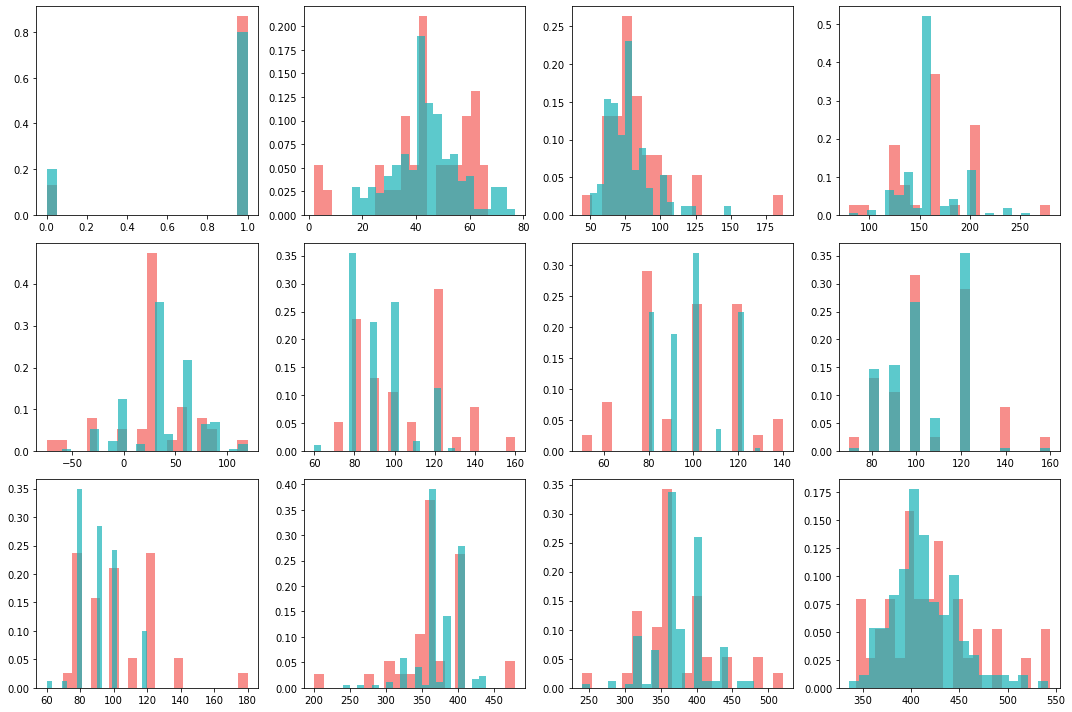

In [16]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
for axs, feat,  in zip(axes.flatten(), df.columns[0:12]):
    
    plot_column_mod(axs, event_df[feat], nonevent_df[feat], 20)

    fig.tight_layout()

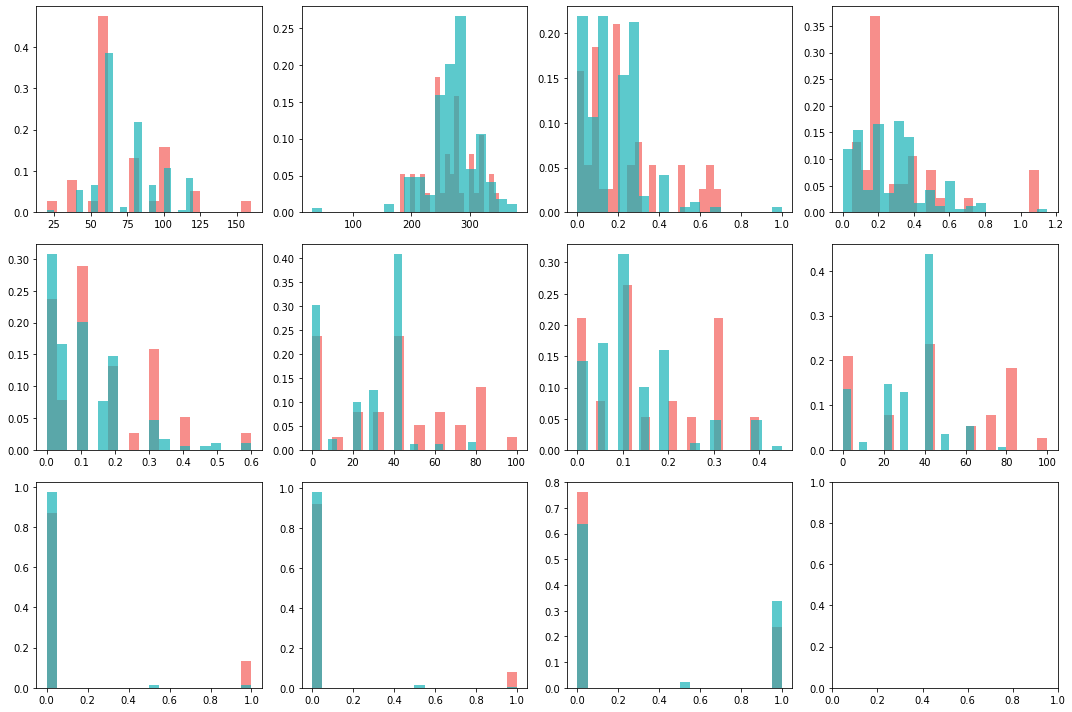

In [17]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
for axs, feat in zip(axes.flatten(), df.columns[13:24]):
    
    plot_column_mod(axs, event_df[feat], nonevent_df[feat], 20)

    fig.tight_layout()

In [18]:
# sns.pairplot(data=df, hue='classifier')

Text(0.5, 0, 'Event')

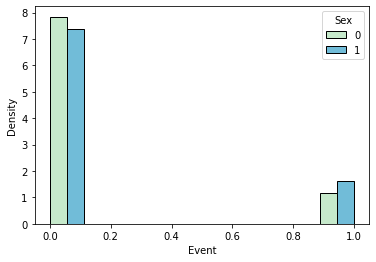

In [43]:
# countplot for event, grouped by sex
sns.histplot(x='classifier', data=df, hue='Sex', multiple="dodge", stat='density', common_norm=False, palette='GnBu')
plt.xlabel('Event')

# more men have events than women?

In [20]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 206
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            196 non-null    int64  
 1   Age            196 non-null    float64
 2   FC             196 non-null    int64  
 3   PRint          196 non-null    float64
 4   QRSaxis        196 non-null    float64
 5   QRSwidDII      196 non-null    float64
 6   QRSwidV1       196 non-null    int64  
 7   QRSwidV2       196 non-null    int64  
 8   QRSwidV6       196 non-null    float64
 9   QTintV5        196 non-null    float64
 10  QTintV2        196 non-null    int64  
 11  cQTintV5       196 non-null    float64
 12  cQTintV2       196 non-null    int64  
 13  TpeakTendV2    196 non-null    float64
 14  JTendV2        196 non-null    int64  
 15  JelevV1        196 non-null    float64
 16  JelevV2        196 non-null    float64
 17  SwidDI         196 non-null    float64
 18  SlenDI    

In [21]:
# train-test split
X = df.drop(columns='classifier')
y = df['classifier']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [23]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(class_weight='balanced_subsample')
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=311; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=311; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=311; total time=   1.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1155; total time=   4.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1155; total time=   4.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1155; total time=   4.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced_subsample'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [24]:
rf_random.best_params_

{'n_estimators': 522,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [44]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_metric(test_labels, predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print(classification_report(test_labels, predictions))
    plot_confusion_matrix(model, test_features, test_labels, labels=[1,0], cmap='GnBu')  
    plt.show()

    return accuracy

Model Performance
Accuracy = 77.50%.
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.33      0.29      0.31         7

    accuracy                           0.78        40
   macro avg       0.59      0.58      0.59        40
weighted avg       0.76      0.78      0.77        40



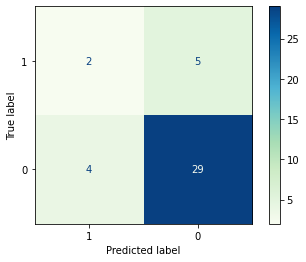

In [45]:
base_model = RandomForestClassifier(n_estimators=1, class_weight='balanced_subsample', random_state=42)
base_model.fit(X_train, y_train)
base_perf = evaluate(base_model, X_test, y_test.values)

Model Performance
Accuracy = 90.00%.
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.43      0.60         7

    accuracy                           0.90        40
   macro avg       0.95      0.71      0.77        40
weighted avg       0.91      0.90      0.88        40



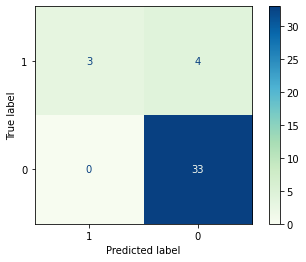

In [46]:
best_random = rf_random.best_estimator_
random_perf = evaluate(best_random, X_test, y_test.values)

In [47]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_perf - base_perf) / base_perf))

Improvement of 16.13%.


In [51]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced_subsample')
rf_param_grid = {'bootstrap': [True, False],
                'n_estimators':[500, 600, 1000, 1500], 
                'max_features': [2, 3],
                'min_samples_leaf': [1, 3, 4, 5],
                'min_samples_split': [5, 8, 10, 12],
                'max_depth':[60, 80, 90, 100, 150]}
rf_cv= GridSearchCV(rf, rf_param_grid, scoring='accuracy', cv=7, n_jobs=-1)
rf_cv.fit(X_train,y_train)

print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

crossval_perf = evaluate(rf_cv, X_test, y_test.values)

In [30]:
rf_cv.best_params_

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        33
           1       0.25      0.57      0.35         7

    accuracy                           0.62        40
   macro avg       0.56      0.60      0.54        40
weighted avg       0.77      0.62      0.67        40



In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (crossval_perf - base_perf) / base_perf))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.688


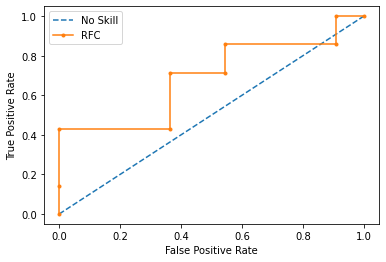

In [41]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = rf_random.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='RFC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.600 auc=0.558


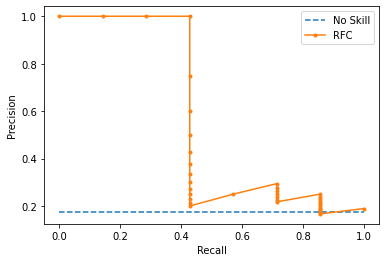

In [42]:
lr_probs = rf_random.predict_proba(X_test)
y_pred_random = rf_random.predict(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred_random), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='RFC')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()